<a href="https://colab.research.google.com/github/aykwan/titanickaggle/blob/main/Titanic_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Titanic Dataset

Description:

Survived: 0 = Did not survive, 1 = Survived

Pclass: Passenger ticket class where 1 = First class, 2 = Second class, 3 = Third class

Sex: Male or female

Age: Age in years

SibSp: Number of siblings or spouses on the Titanic

Parch: Number of parents or children on the Titanic

Ticket: Passenger ticket number

Fare: Passenger fare

Cabin: Passenger cabin number

Embarked: Point of embarkation where C = Cherbourg, Q = Queenstown, S = Southampton

The first step to getting started is to preload the necessary packages. The Google Drive package has to be mounted in order to access my files.

In [3]:
#Import pandas, numpy and Mount the Google Drive
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load the files and store into a data frame with pandas and load the first 5 rows of each dataset.

In [4]:
df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Titanic/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Titanic/test.csv")

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Count the number of rows for the train and test datasets.

In [ ]:
df_train.shape[0]

891

In [ ]:
df_test.shape[0]

418

Determine the features that are categorical and numerical in nature.

In [ ]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Passenger ID: Numerical; discrete

Survived: Categorical; nominal

Pclass: Categorical; nominal

Name: Categorical; nominal

Sex: Categorical; nominal

Age: Numerical; ratio

SibSp: Numerical, discrete

Parch: Numerical, discrete

Ticket: Categorical; nominal

Fare: Numerical; discrete

Cabin: Categorical; nominal

Embarked: Categorical; nominal

With these noted, some of the attributes needs to be converted to reflect their actual type:

-Survived

-Pclass

In [5]:
col = ['Pclass', 'Survived']
df_train[col] = df_train[col].astype('category')

#Note that "Survived" does not exist in the test file as this is dependent variable to predict
df_test['Pclass'] = df_test['Pclass'].astype('category')

df_train.dtypes

PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
dtype: object

Plot the attributes for each dataset

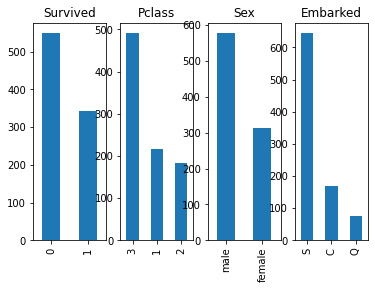

In [ ]:
categorical_features = ["Survived", "Pclass", "Sex", "Embarked"]
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(df_train[categorical_features]):
  df_train[categorical_feature].value_counts().plot(kind="bar", ax=ax[i]).set_title(categorical_feature)
fig.show()

Examine the numerical attributes.

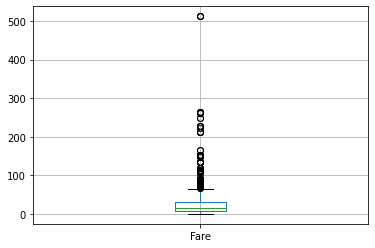

In [ ]:
#plotbox on numerical features
boxplot = df_train.boxplot(column=["Fare"])

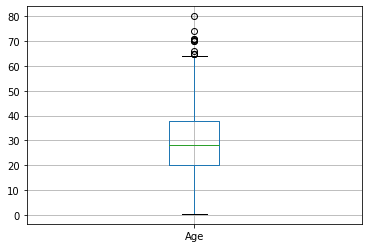

In [ ]:
boxplot = df_train.boxplot(column=["Age"])

Seems the average fare of passengers tended to faring the pre-100s with one particular outlier at $500+ a ticket. As for ages, the majority of ages tend to lie in between 20-40.

Let us examine the number of missing values for each column of the test and train dataset.

In [ ]:
#train dataset
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#test dataset
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

For the train dataset, there are 177 missing values out of 891 values which represent 20% are missing an age. As for the cabin attribute, 687 out of 891 do not possess a value (77%).

For the test dataset, 86 (21%) and 327 (78%) are missing out of the 418 values.

In [24]:
df_train[df_train["Age"].isnull() & (df_train.SibSp == 0) & (df_train.Parch == 0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
837,838,0,3,"Sirota, Mr. Maurice",male,NaN,0,0,392092,8.0500,NaN,S
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


In [20]:
df_train[df_train["Cabin"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


After tinkering with the data, there does seems to be correlation to the passengers who don't have an age. They do not have any siblings, children, or parents aboard. We can safely assume these passengers are over the age 18.

In [27]:
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [28]:
df_train['Age'].mode()

0    24.0
dtype: float64

The mean, mode, and median are of similar age ranges. I have decided to replace the NaN values in the age attribute with the median as that shouldn't dramatically skewer the results and surveying the missing values, I can assume that the 133 of the 177 (75%( passengers who don't have another person with them are of an adult age.

The cabin attribute does not provide too added value as a significant number of the passengers don't have a listed value recorded. For that, I have decided to drop the cabin attribute altogether.

For the embarked attribute on the train dataset, since only 2 values are missing, it's reasonably safe to replace those NaN values with the mode value for the column.

Lastly, there is one missing value for the fare attribute in the test dataset. To address this, simply putting the median value would be the simplest solution.

In [55]:
#Make a copy of the original dataframe.
df_train_new = df_train.copy()

In [56]:
df_train_new['Age'] = df_train_new['Age'].fillna(df_train_new['Age'].median())
df_train_new['Embarked'] = df_train_new['Embarked'].fillna(df_train_new['Embarked'].mode()[0])
del df_train_new['Cabin']
df_train_new.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [57]:
df_train_new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [59]:
#Do the same for the test dataset excluding the necessity to replace the embarked attribute since there are no NaN values in there.
df_test_new = df_test.copy()
df_test_new['Age'] = df_test_new['Age'].fillna(df_test_new['Age'].median())
del df_test_new['Cabin']
df_test_new['Fare'] = df_test_new['Fare'].fillna(df_test_new['Fare'].median())
df_test_new.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64